In [1]:
import numpy as np

def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    return tmpx,tmpy

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")
    plt.show()

In [2]:
path_to_train = '../../data/USPS_train.txt'
path_to_test = '../../data/USPS_test.txt'

X_train, y_train = load_usps(path_to_train)
X_test, y_test = load_usps(path_to_test)

In [3]:
print(X_train.shape)
print(y_train.shape)

(7291, 256)
(7291,)


In [4]:
from src.SequentielNet import Sequentiel, Optim, SGD
from src.LinearModel import Linear
from src.Loss import CELossSoftMax
from src.NonLinearModel import Tanh, Sigmoid
import matplotlib.pyplot as plt
import numpy as np

In [5]:
batch = 64
input = 256
output1 = 128
output2 = 64
output3 = 20
output4 = 10

epochs = 100

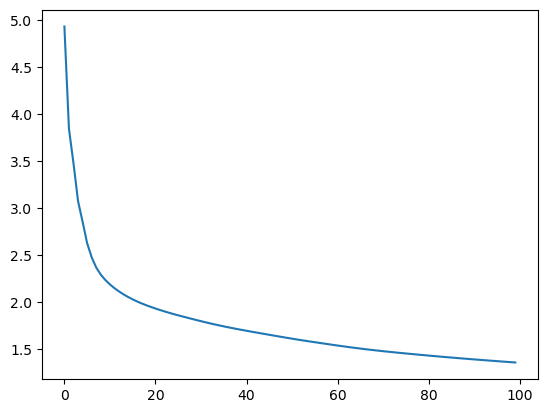

In [6]:
net = Sequentiel(Linear(input, output1), Sigmoid(), Linear(output1, output2), Sigmoid(), Linear(output2, output3), Sigmoid(), Linear(output3, output4))
optim = Optim(net, CELossSoftMax(), 0.1)
scores = []

for iteration in range(epochs):
    optim.clean_output()
    optim.zero_score()
    optim.step(X_train, y_train)
    optim.update_output()
    scores.append(optim.score.sum())


plt.plot(np.arange(epochs), scores)
plt.show()


In [7]:
optim.yhat

array([[ 1.57203475, -2.0070241 ,  0.08802327, ..., -0.14742299,
        -0.3011995 , -0.3860301 ],
       [ 1.03024025, -2.13923887,  0.47700369, ..., -0.5535346 ,
        -0.08592678, -0.71993635],
       [ 0.54873818, -3.79657822, -0.11656992, ..., -0.67096892,
         0.6763511 ,  0.28948443],
       ...,
       [ 1.6584592 , -1.75219274,  0.15144524, ..., -0.29218401,
         0.13349946,  0.75419175],
       [ 1.85258693, -1.70783119,  0.21363365, ..., -0.13346396,
        -0.0670638 ,  0.0135218 ],
       [-2.08691423,  0.81934939,  1.70208112, ...,  0.39876969,
         0.39411539, -1.53321636]])

In [8]:
def softmax(X):
    return np.exp(X) / np.exp(X).sum()

In [9]:
print(softmax(optim.yhat))

[[1.66260112e-06 4.63898065e-08 3.76955487e-07 ... 2.97877061e-07
  2.55418746e-07 2.34645002e-07]
 [9.67140807e-07 4.06445588e-08 5.56188649e-07 ... 1.98456363e-07
  3.16770350e-07 1.68034193e-07]
 [5.97552428e-07 7.74870415e-09 3.07210729e-07 ... 1.76467182e-07
  6.78887169e-07 4.61087704e-07]
 ...
 [1.81268246e-06 5.98541702e-08 4.01637157e-07 ... 2.57731883e-07
  3.94493751e-07 7.33843357e-07]
 [2.20105215e-06 6.25691692e-08 4.27407331e-07 ... 3.02064293e-07
  3.22802293e-07 3.49892388e-07]
 [4.28278939e-08 7.83251023e-07 1.89350515e-06 ... 5.14334348e-07
  5.11946043e-07 7.45065830e-08]]


In [10]:
from sklearn.metrics import accuracy_score

#### Train set accuracy

In [11]:
pred = np.argmax(softmax(optim.yhat), axis=1)
print(f'accuracy : {accuracy_score(y_train, pred)}')

accuracy : 0.5360032917295295


In [12]:
pred[1]

0

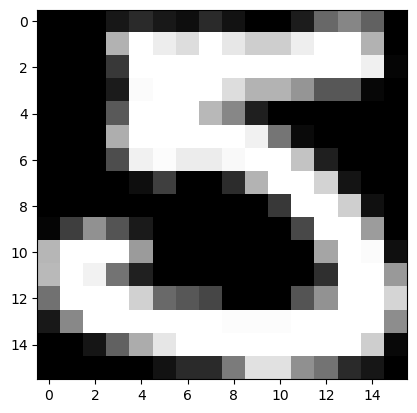

In [13]:
show_usps(X_train[1])

#### Test set accuracy

In [14]:
optim.clean_output()
optim.step(X_test, y_test)
optim.update_output()

pred_test = np.argmax(softmax(optim.yhat), axis=1)
print(f'accuracy : {accuracy_score(y_test, pred_test)}')

accuracy : 0.5117090184354758


#### SGD

In [15]:
net2 = Sequentiel(Linear(input, output1), Sigmoid(), Linear(output1, output2), Sigmoid(), Linear(output2, output3), Sigmoid(), Linear(output3, output4))

optim2 = SGD(net2, X_train, y_train, batch, epochs, CELossSoftMax(), eps=0.1)

D:\SchoolWork\M1S2\ML\M1S2-ML-Projet\src\NonLinearModel.py:32: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


In [16]:
print(optim2.score)

23.381263916368642


#### Train set accuracy

In [20]:
pred = np.argmax(softmax(optim2.yhat), axis=1)
print(f'accuracy : {accuracy_score(y_train, pred)}')

accuracy : 0.938828692909066


#### Test set accuracy

In [22]:
optim2.clean_output()
optim2.step(X_test, y_test)
optim2.update_output()

pred_test = np.argmax(softmax(optim2.yhat), axis=1)
print(f'accuracy : {accuracy_score(y_test, pred_test)}')

accuracy : 0.8858993522670653


**We can find that the method with batch which split the data set has greater performance than that without batch (within the same iterations).**
**Because of the split of the data set, this method has more implicit learning iterations.**